<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考；https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipyn；](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [3]:
!pip install ultralytics
!pip install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 115 (delta 13), reused 8 (delta 8), pack-reused 94 (from 1)
Receiving objects: 100% (115/115), 41.00 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/YOLO-V11-CAM


In [6]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="check.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

In [13]:
img = cv2.imread('/content/check/011 (6).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255


0: 640x640 NG 0.97, OK 0.03, 80.2ms
Speed: 12.5ms preprocess, 80.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


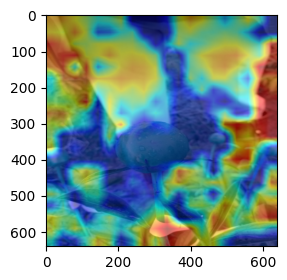

In [14]:
model = YOLO('/content/classify.pt')
model = model.cpu()
target_layers =[model.model.model[-2]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 NG 0.61, OK 0.39, 89.5ms
Speed: 13.2ms preprocess, 89.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


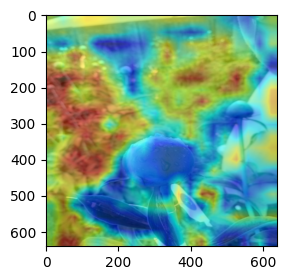

In [12]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

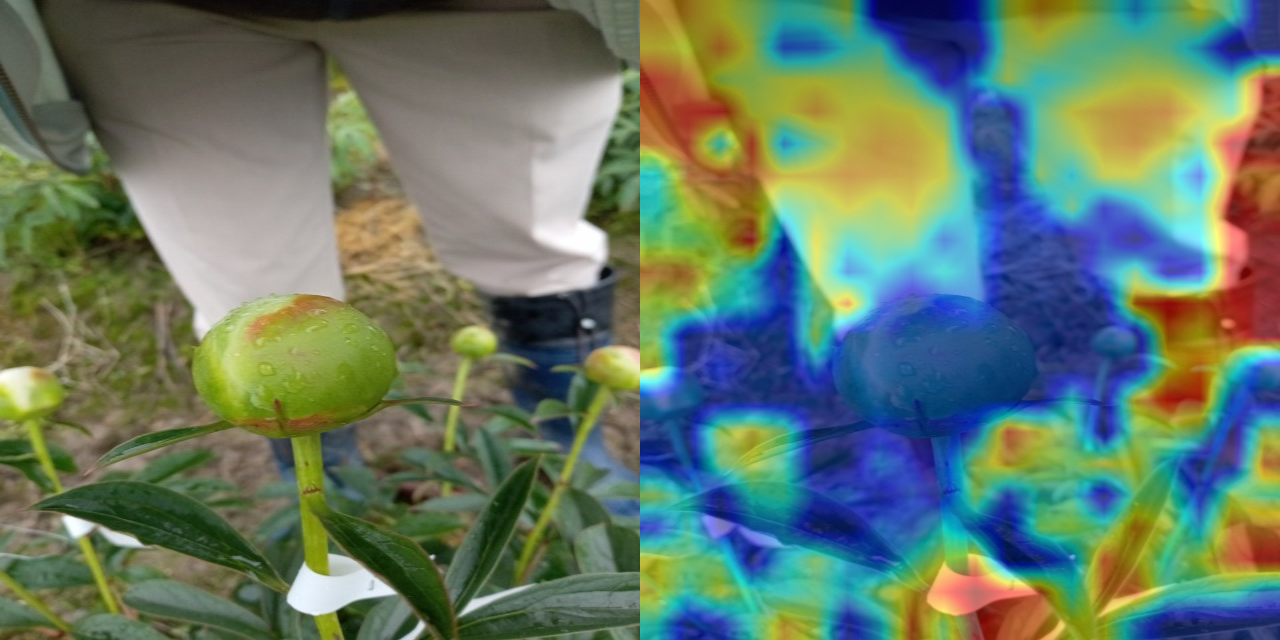

In [15]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))